<a href="https://colab.research.google.com/github/vamsikrishna077/CODEWAY/blob/main/Moviegenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer,PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [3]:
tp="Genre Classification Dataset/train_data.txt"
train=pd.read_csv(tp,sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'],engine='python')


In [4]:
train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
train.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [7]:
train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [8]:
tep="Genre Classification Dataset/test_data.txt"
test=pd.read_csv(tep,sep=":::",names=['id','TITLE','DESCRIPTION'],engine='python')

In [9]:
test.head()


,id,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
test.describe()

,id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [12]:
test.isnull().sum()

id             0
TITLE          0
DESCRIPTION    0
dtype: int64

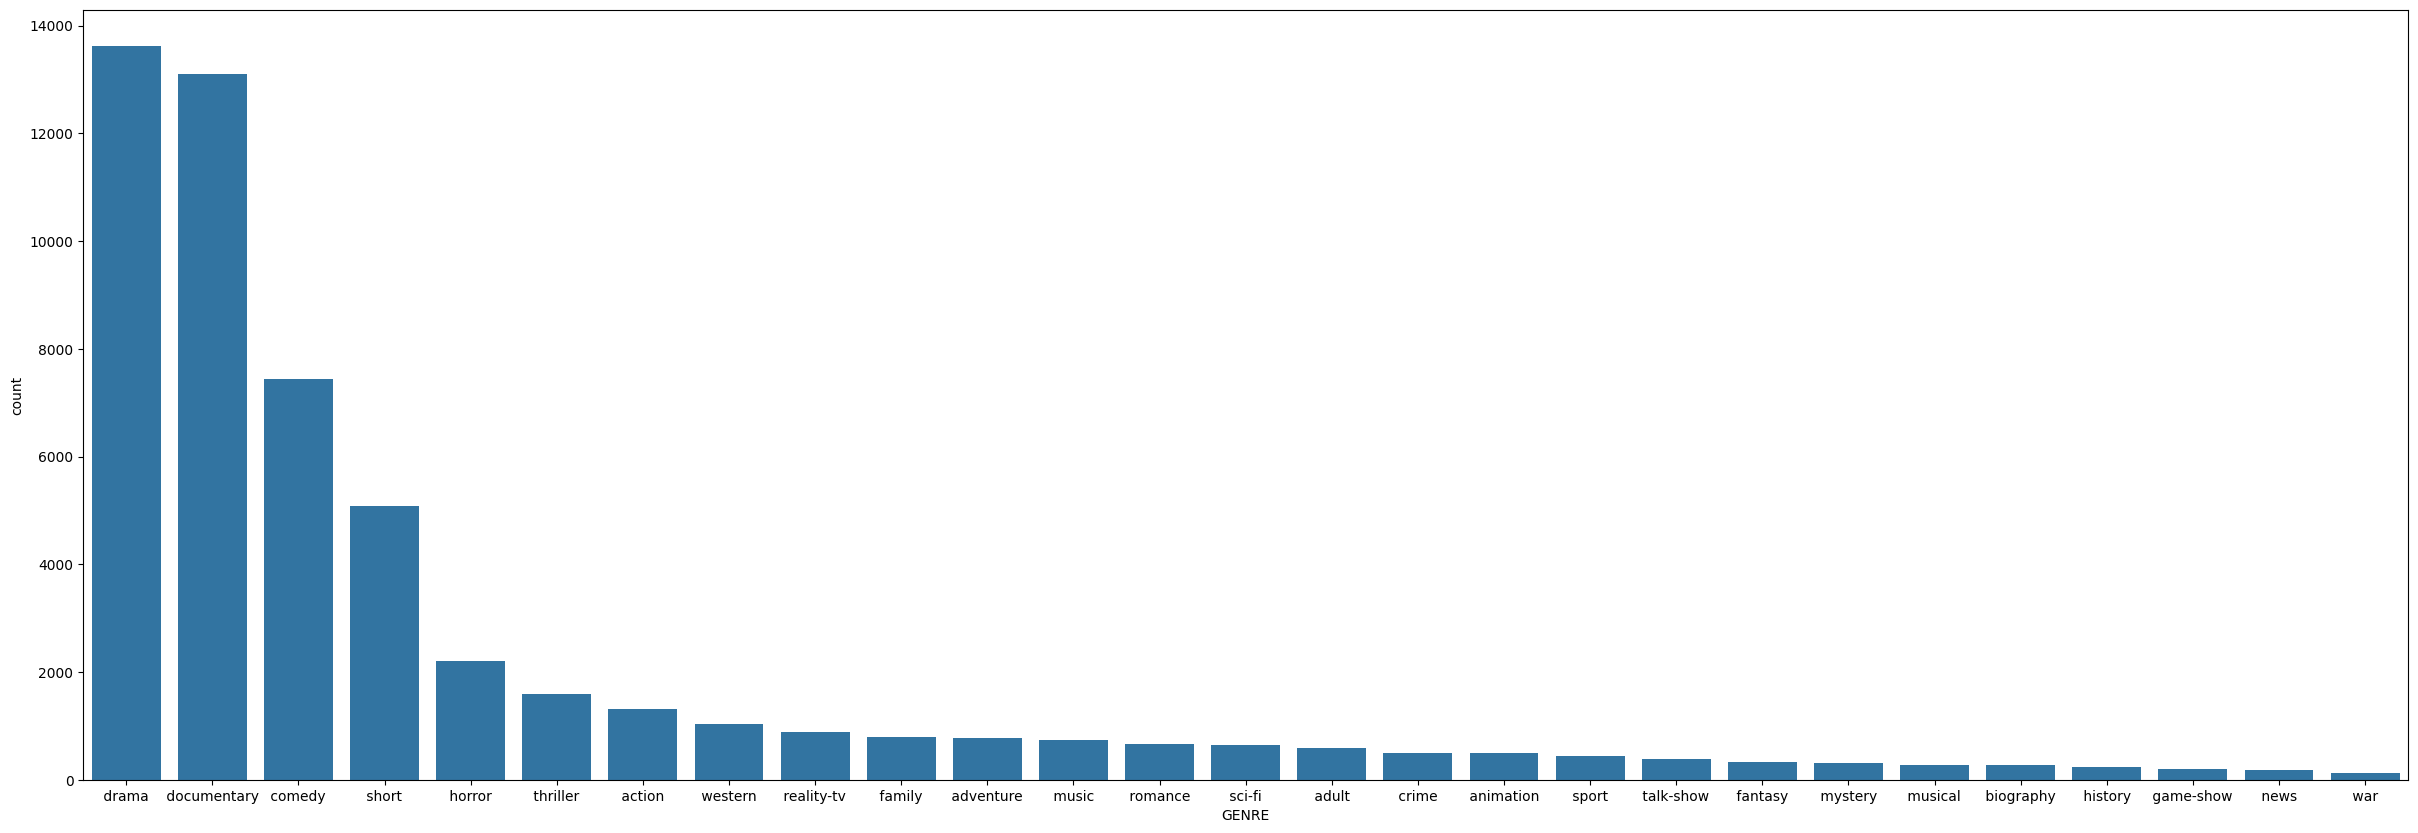

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(data=train,x='GENRE',order=train['GENRE'].value_counts().index)
plt.show()

In [14]:
train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [15]:

stemmer=LancasterStemmer()
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
nltk.download('punkt')

stop_words = set(stopwords.words("english"))  # Stopwords set

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)  # replace twitter accounts with a space
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'#','',text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train["TextCleaning"] = train["DESCRIPTION"].apply(clean_text)
test["TextCleaning"] = test["DESCRIPTION"].apply(clean_text)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
train

,ID,TITLE,GENRE,DESCRIPTION,TextCleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [18]:
st = PorterStemmer()
train['TextCleaning'] = train['TextCleaning'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
test['TextCleaning'] = test['TextCleaning'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [19]:
train


,ID,TITLE,GENRE,DESCRIPTION,TextCleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short live nbc live sitcom center bonino world...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next gener exploit sister kapa bay soror hous ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedi grow face fear freer...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live countri difficult time keep...


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['GENRE'] = le.fit_transform(train['GENRE'].values)



In [21]:
# keep only relevent columns
train_df = train.loc[:,['TextCleaning', 'GENRE']]
test_df = test.loc[:,['TextCleaning', 'TITLE']]
train_df.head(10)

,TextCleaning,GENRE
0,listen convers doctor parent year old oscar le...,8
1,brother sister past incestu relationship curre...,24
2,bu empti student field trip museum natur histo...,1
3,help unemploy father make end meet edith twin ...,8
4,film titl refer recov bodi ground zero also st...,8
5,qualiti control consist seri singl take shot f...,7
6,tough econom time max joey run idea discov sen...,5
7,ron petri keanu reev troubl teen whose life ha...,6
8,sudden calamit event caus great loss life dama...,18
9,four high school student embark terrifi journe...,13


In [22]:
X_train,X_test,y_train,y_test=train_test_split(train_df['TextCleaning'] ,train['GENRE'] , test_size=0.2 , shuffle=True , random_state = 42)
print(f'Split data into train and eval sets')
print(f'Traning Set\t: {len(X_train)}\nValidation Set\t: {len(X_test)}')

Split data into train and eval sets
Traning Set	: 43371
Validation Set	: 10843


In [26]:
vectorize = TfidfVectorizer(stop_words='english', max_features=1000)

X_train_tfidf = vectorize.fit_transform(X_train)

X_test_tfidf = vectorize.transform(X_test)

In [28]:
from sklearn.svm import LinearSVC
sv_model = LinearSVC(max_iter=1000)
sv_model.fit(X_train_tfidf,y_train)
predict_sv=sv_model.predict(X_test_tfidf)
print(classification_report(y_test, predict_sv))
sv_accuracy = accuracy_score(y_test,predict_sv)
print('Support vector accuracy is: {:.2f}%'.format(sv_accuracy*100))

              precision    recall  f1-score   support

           0       0.38      0.20      0.26       263
           1       0.54      0.33      0.41       112
           2       0.28      0.11      0.16       139
           3       0.37      0.16      0.23       104
           4       0.00      0.00      0.00        61
           5       0.48      0.49      0.49      1443
           6       0.16      0.04      0.06       107
           7       0.66      0.83      0.73      2659
           8       0.54      0.73      0.62      2697
           9       0.31      0.11      0.17       150
          10       0.12      0.01      0.02        74
          11       0.59      0.60      0.59        40
          12       0.00      0.00      0.00        45
          13       0.52      0.61      0.56       431
          14       0.49      0.51      0.50       144
          15       0.13      0.04      0.06        50
          16       0.15      0.04      0.06        56
          17       0.40    

In [24]:
lr_model=LogisticRegression()
lr_model.fit(X_train_tfidf,y_train)
predict_lr=lr_model.predict(X_test_tfidf)
print(classification_report(y_test, predict_lr))
lr_accuracy = accuracy_score(y_test, predict_lr)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr_accuracy * 100))

              precision    recall  f1-score   support

           0       0.55      0.28      0.37       263
           1       0.82      0.28      0.41       112
           2       0.42      0.13      0.20       139
           3       0.44      0.04      0.07       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.30      0.03      0.05       107
           7       0.66      0.84      0.74      2659
           8       0.53      0.79      0.64      2697
           9       0.42      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       0.94      0.38      0.54        40
          12       0.00      0.00      0.00        45
          13       0.66      0.58      0.62       431
          14       0.65      0.51      0.57       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [31]:
nv_model=MultinomialNB()
nv_model.fit(X_train_tfidf,y_train)
predict_nv=nv_model.predict(X_test_tfidf)
print(classification_report(y_test, predict_nv))
nv_accuracy = accuracy_score(y_test, predict_nv)
print('Logistic Regression accuracy is: {:.2f}%'.format(nv_accuracy * 100))

              precision    recall  f1-score   support

           0       0.43      0.05      0.08       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.49      0.31      0.38      1443
           6       0.00      0.00      0.00       107
           7       0.55      0.86      0.67      2659
           8       0.43      0.83      0.57      2697
           9       1.00      0.01      0.01       150
          10       0.00      0.00      0.00        74
          11       1.00      0.17      0.30        40
          12       0.00      0.00      0.00        45
          13       0.70      0.24      0.36       431
          14       0.63      0.20      0.31       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
columns=['LogisticRegression', 'MultinomialNB','SVC']
accuracy= [lr_accuracy, nv_accuracy, sv_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.579821
1,MultinomialNB,0.493037
2,SVC,0.552061


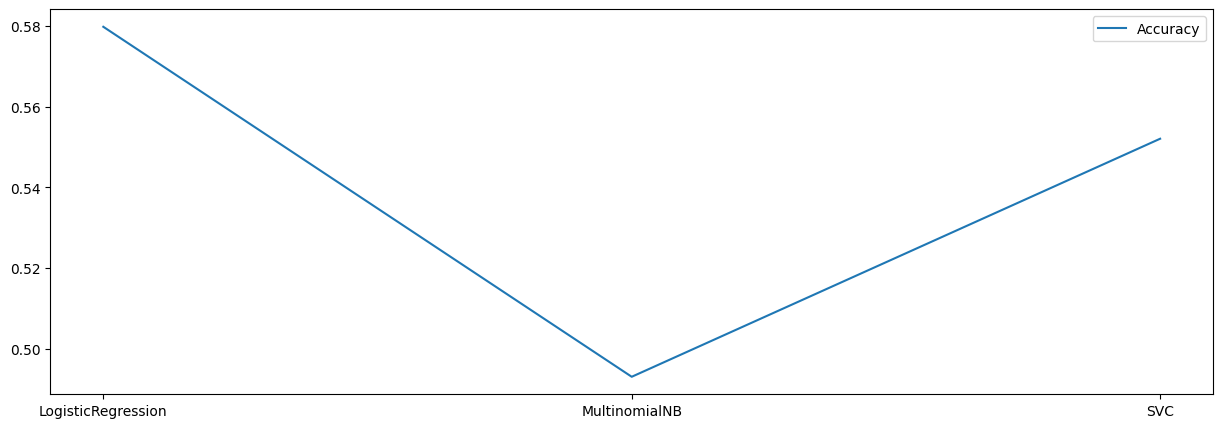

In [33]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()